# Import LIbary

In [152]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt

# read dataset hoax-valid.csv

In [253]:
dataset = pd.read_csv(r"hoax-valid.csv", sep=';')

In [254]:
dataset

,berita,tagging
0,"Jakarta, Di jejaring sosial, banyak beredar in...",Valid
1,Isu bahwa ikan lele mengandung sel kanker di j...,Valid
2,Bagi penikmat kuliner dengan bahan dasar ikan ...,Valid
3,Ikan lele merupakan salah satu makanan favorit...,Valid
4,Ikan lele merupakan bahan makanan yang cukup p...,Valid
...,...,...
595,Kabar yang beredar seputar rencana kenaikan ga...,Valid
596,Kabar yang beredar seputar rencana kenaikan ga...,Valid
597,"Akhir-akhir ini, beredar pemberitaan yang meny...",Valid
598,Rancangan peraturan pemerintah (RPP) tentang G...,Valid


# Download stopwords

In [255]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [256]:
corpus = []

# Preprocessing dataset 

In [257]:
for i in range(len(dataset)):
    # remove unwanted characters
    text = re.sub('[^a-zA-Z]','',dataset['berita'][i])
    
    # make all text in dokuments into lowercase
    text = text.lower()
    text = text.split()
    
    # Stemming the text (kata dasar)
    ps = PorterStemmer()
    text = ''.join(text)
    corpus.append(text)

In [258]:
# creating bag of words with max_featrues: 1500
cv = CountVectorizer(max_features = 1500)

In [259]:
# tranform the corpus into array
x = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:,1].values

In [260]:
# splitting the dataset into 80% training set and 20% test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Fitting Bernoulli Naive Bayes Model to the Training set 

In [261]:
# fitting naive bayes to the training set
from sklearn.naive_bayes import BernoulliNB

Training Model 

In [262]:
classifier = BernoulliNB()
classifier.fit(x_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

Score (Accuracy) Training Model

In [263]:
classifier.score(x_train, y_train)

0.6145833333333334

Testing Model

In [264]:
# predicting test set results
y_pred = classifier.predict(x_test)

Accuracy from testing Model

In [265]:
classifier.score(x_test, y_test)

0.6416666666666667

In [266]:
print("Number of mislabeled points out of a total %d points : %d" % (x_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 120 points : 43


# Confusion matrix without seaborn

In [267]:
cm = confusion_matrix(y_test, y_pred, normalize='true')
cm

array([[0., 1.],
       [0., 1.]])

# Performance Evaluation

In [268]:
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

        Hoax      0.000     0.000     0.000        43
       Valid      0.642     1.000     0.782        77

    accuracy                          0.642       120
   macro avg      0.321     0.500     0.391       120
weighted avg      0.412     0.642     0.502       120



C:\Users\user\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Confusion Matrix with seaborn

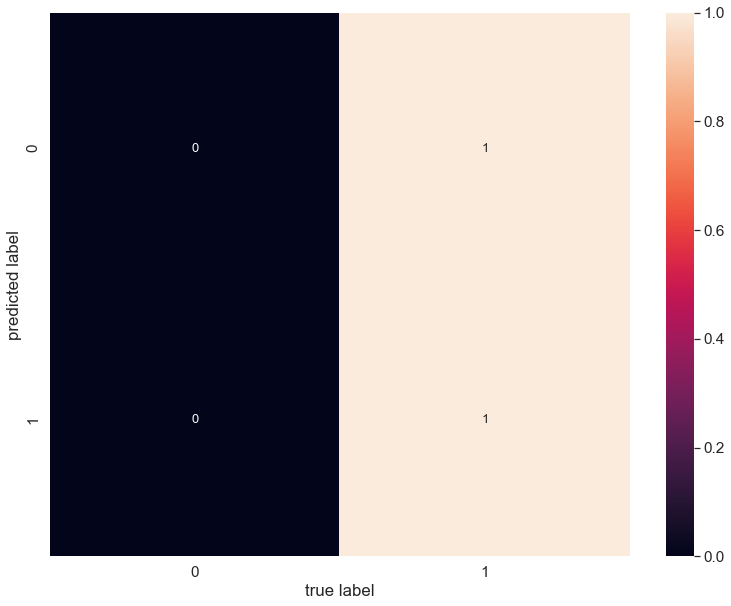

In [269]:
df_cm = pd.DataFrame(cm, range(2), range(2))
plt.figure(figsize=(13,10))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 13}) # font size
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()